In [59]:
from collections import defaultdict
from random import random, randint
from glob import glob
from math import log
import argparse
import json
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import pylab as pl
from pandas import *
from nltk.tokenize import TreebankWordTokenizer
kTOKENIZER = TreebankWordTokenizer()
kDOC_NORMALIZER = True
from nltk.collocations import *
import time
import string
from gensim.corpora.dictionary import Dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models import LdaModel
import os

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import os
import string
import nltk
from nltk import word_tokenize
from scipy.spatial.distance import cosine
from nltk.corpus import stopwords
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
%matplotlib inline
from os import listdir
from os.path import isfile, join
from wordcloud import WordCloud
import gensim
from sklearn.cluster import KMeans
from collections import Counter 
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import gensim
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [43]:
nlp = spacy.load('en')
stop_words_list = list(spacy.lang.en.STOP_WORDS)
punctuation_list = list(string.punctuation)
punctuation_list.extend('\r')
punctuation_list.extend('\n')
punctuation_list.extend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [5]:
def cleaning(element):
    final_list = []
    """ Clean up text. Tokenize, lowercase, and remove punctuation and stopwords """
    #print("Running cleaner")
    # Remove punctuation, symbols (#) and stopwords
    element = str(element).lower()
    new_string = ''
    for char in element:
        if char not in punctuation_list:
            new_string += char
    all_wrds = new_string.split(" ")
    for word in all_wrds:
        if word not in stop_words_list:
            final_list.append(word)
    final_string = ' '.join(final_list)
    return final_string

In [70]:
master= []
def tokenize(str_arg):
    words = str_arg.split()
    return words

def append(row):
    master.append(row)   

In [37]:
df_Seattle = pd.read_csv('data/reviews_Seattle.csv')
df_Seattle = df_Seattle.dropna()
df_Seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...


In [38]:
df_Seattle['cleaned_comments'] = df_Seattle['comments'].apply(cleaning)
df_Seattle['tokens'] = df_Seattle['cleaned_comments'].apply(tokenize)
df_Seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,tokens
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.,times better staying hotel,"[times, better, staying, hotel]"
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an...",family couples year old infant incredible stay...,"[family, couples, year, old, infant, incredibl..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...,list locations stayed house perfect families c...,"[list, locations, stayed, house, perfect, fami..."
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s...",awesome place clean quiet spacious loved,"[awesome, place, clean, quiet, spacious, loved]"
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...,flew distance daughters graduation needed plac...,"[flew, distance, daughters, graduation, needed..."


In [10]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arushij1711/nltk_data...


True

In [39]:
sid = SentimentIntensityAnalyzer()
def sentiment_score(row):
    try:
        return sid.polarity_scores(text = row)
    except:
        print(row)

In [44]:
df_Seattle['scores'] = df_Seattle['comments'].apply(sentiment_score)
df_Seattle['cleaned_scores'] = df_Seattle['cleaned_comments'].apply(sentiment_score)
df_Seattle.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,cleaned_comments,tokens,scores,cleaned_scores
0,2318,146,2008-09-15,2451,Kevin,1000 times better than staying at a hotel.,times better staying hotel,"[times, better, staying, hotel]","{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...","{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
1,2318,126302712,2017-01-10,12332845,Jessica,"Our family (two couples, a two year old and an...",family couples year old infant incredible stay...,"[family, couples, year, old, infant, incredibl...","{'neg': 0.022, 'neu': 0.736, 'pos': 0.242, 'co...","{'neg': 0.014, 'neu': 0.581, 'pos': 0.405, 'co..."
2,2318,140977084,2017-04-01,4789466,Ivan,Top of the list locations we have stayed at! T...,list locations stayed house perfect families c...,"[list, locations, stayed, house, perfect, fami...","{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...","{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'comp..."
3,2318,147262504,2017-04-25,55817131,Mike,"SUCH an awesome place. Very clean, quiet and s...",awesome place clean quiet spacious loved,"[awesome, place, clean, quiet, spacious, loved]","{'neg': 0.0, 'neu': 0.415, 'pos': 0.585, 'comp...","{'neg': 0.0, 'neu': 0.219, 'pos': 0.781, 'comp..."
4,2318,161806368,2017-06-18,113604590,Pete,We flew quite a distance to be at our only dau...,flew distance daughters graduation needed plac...,"[flew, distance, daughters, graduation, needed...","{'neg': 0.037, 'neu': 0.803, 'pos': 0.16, 'com...","{'neg': 0.067, 'neu': 0.643, 'pos': 0.29, 'com..."


Text(0.5, 1.0, 'Neutrality')

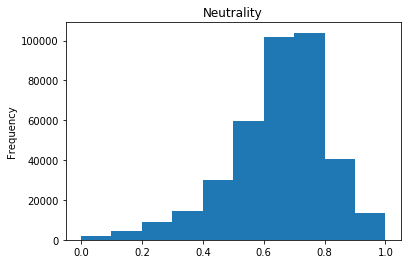

In [45]:
pd.Series([score['neu'] for score in df_Seattle['scores'] ]).plot(kind='hist')
pl.title("Neutrality")

Text(0.5, 1.0, 'Positivity')

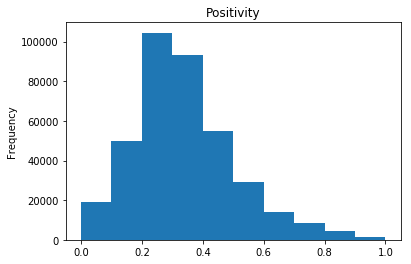

In [47]:
pd.Series([score['pos'] for score in df_Seattle['scores']]).plot(kind='hist')
pl.title("Positivity")

Text(0.5, 1.0, 'Negativity')

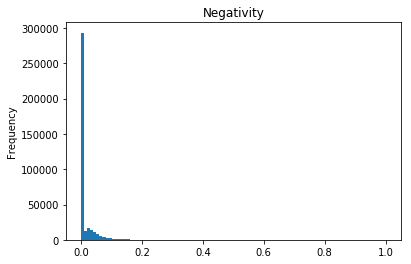

In [48]:
pd.Series([score['neg'] for score in df_Seattle['scores']]).plot(kind='hist', bins=100)
pl.title("Negativity")

In [67]:
(pd.Series([score['neg'] for score in df_Seattle['scores']])).mean()

0.012038991206675898

In [68]:
(pd.Series([score['pos'] for score in df_Seattle['scores']])).mean()

0.3381235336769822

In [69]:
(pd.Series([score['neu'] for score in df_Seattle['scores']])).mean()

0.6489564077887592

In [75]:
placeholder = df_Seattle['comments'].apply(append)
final_string = "\n".join(master)
    

In [76]:
myfile = open("comments_Seattle.txt", "w")
myfile.write(final_string)
myfile.close()

In [78]:
!mv comments_Seattle.txt /Users/arushij1711/nltk_data/corpora/genesis/comments_Seattle.txt

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

comments = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('comments_Seattle.txt'))

comments.apply_freq_filter(3) 

# return the 10 n-grams with the highest PMI (point wise mutual information)
comments.nbest(bigram_measures.pmi, 10)